In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import datetime
import warnings

In [63]:

bikes=pd.read_csv('train.csv')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


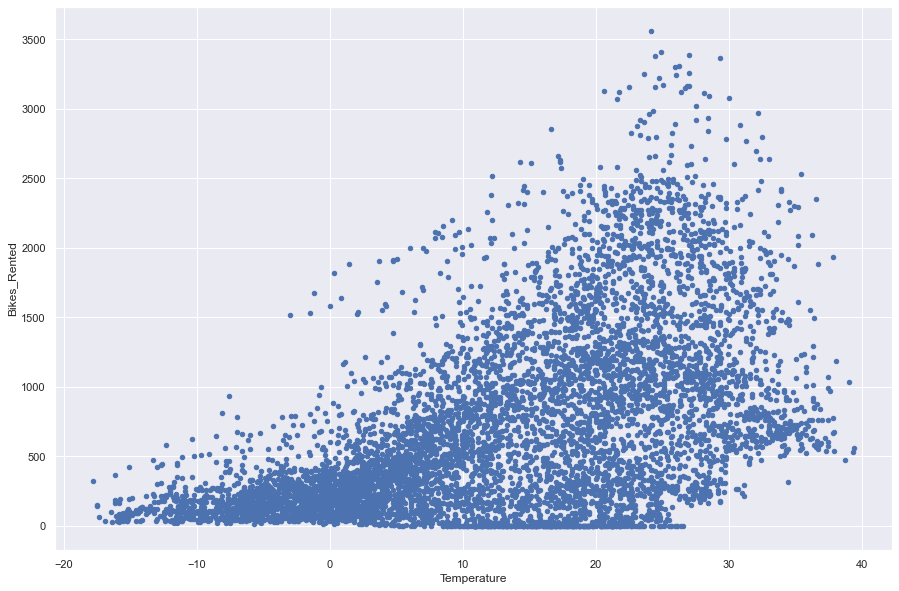

In [168]:
bikes #show the dataframe

ax2 = bikes.plot.scatter(x='Temperature',
                      y='Bikes_Rented',
                      colormap='viridis',figsize=(15,10))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


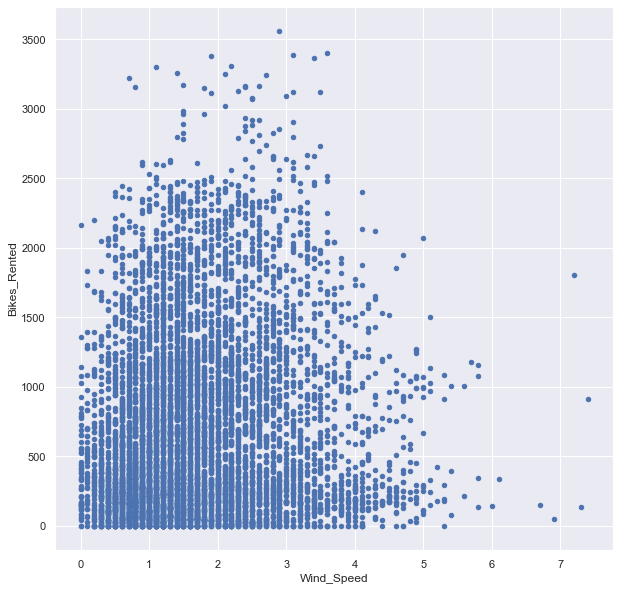

In [166]:

ax4 = bikes.plot.scatter(x='Wind_Speed',y='Bikes_Rented',colormap='viridis',figsize=(10,10))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


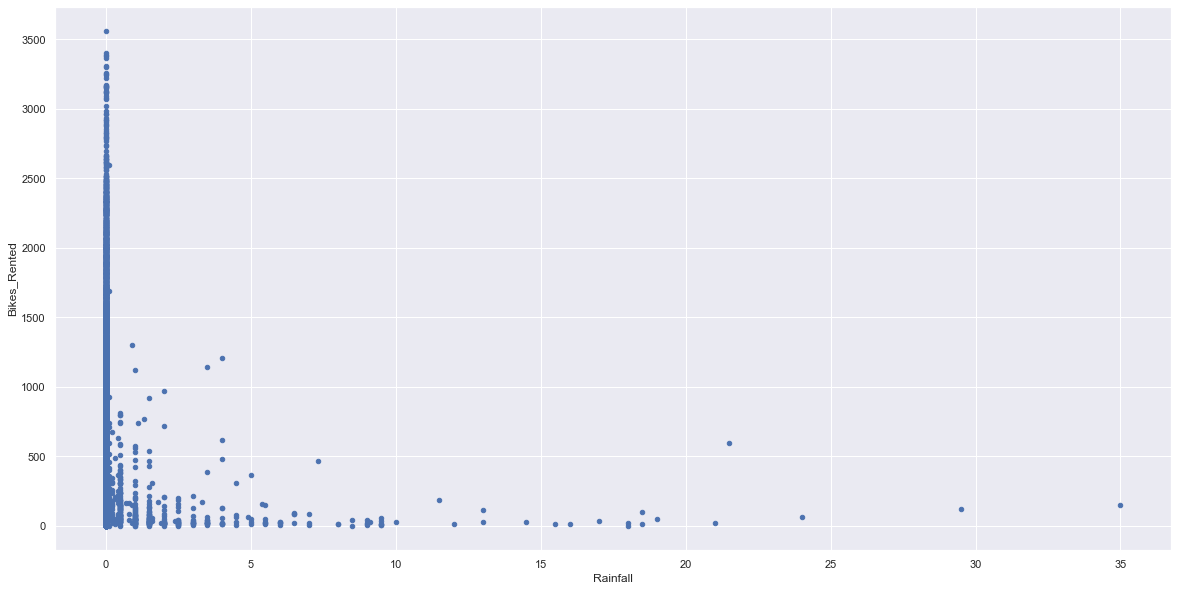

In [164]:
ax3 = bikes.plot.scatter(x='Rainfall',
                      y='Bikes_Rented',
                      colormap='viridis',figsize=(20,10))

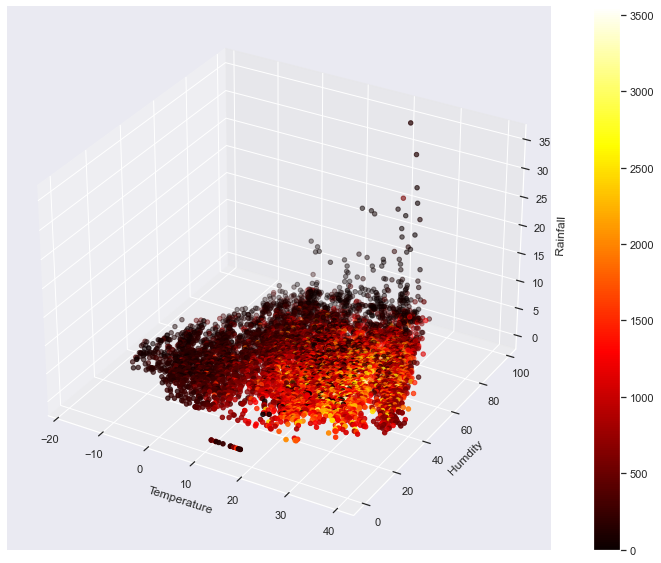

In [178]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

x = bikes['Temperature']
y = bikes['Humidity']
z = bikes['Rainfall']
c = bikes['Bikes_Rented']




img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)


plt.xlabel("Temperature")
plt.ylabel("Humdity")
ax.set_zlabel("Rainfall")
plt.show()

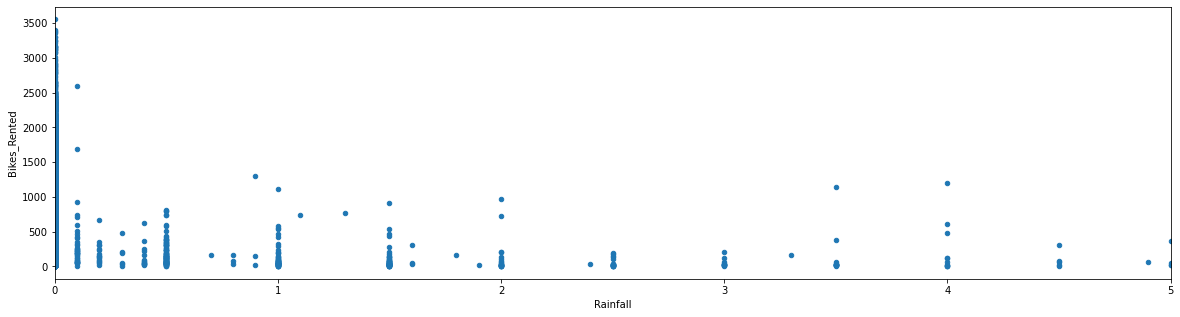

In [19]:
ax6 = bikes.plot.scatter(x='Rainfall',
                      y='Bikes_Rented',
                      colormap='viridis',figsize=(20, 5),xlim=(0,5))


In [20]:
bikes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                7260 non-null   int64  
 1   Date              7260 non-null   object 
 2   Hour              7260 non-null   int64  
 3   Temperature       7260 non-null   float64
 4   Humidity          7260 non-null   int64  
 5   Wind_Speed        7260 non-null   float64
 6   Visibility        7260 non-null   int64  
 7   Dew_Point         7260 non-null   float64
 8   Solar_Radiation   7260 non-null   float64
 9   Rainfall          7260 non-null   float64
 10  Snowfall          7260 non-null   float64
 11  Season            7260 non-null   object 
 12  IsHoliday         7260 non-null   int64  
 13  IsFunctioningDay  7260 non-null   int64  
 14  Bikes_Rented      7260 non-null   int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 850.9+ KB


In [21]:
bikes["Season"].value_counts() #Counting each season instances to make sure the data is properly balanced

Summer    1823
Winter    1819
Spring    1818
Autumn    1800
Name: Season, dtype: int64

In [22]:
bikes.describe() #Using descibe() method to find stastical information about the the attributes

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented
count,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,4362.661295,11.497658,12.838871,58.258127,1.720441,1439.033333,4.048223,0.568001,0.150510,0.074050,0.050275,0.967355,703.427548
std,2531.561970,6.933540,12.043146,20.358714,1.039105,606.862754,13.141417,0.866972,1.169305,0.426481,0.218528,0.177717,645.327438
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2155.750000,5.000000,3.200000,42.000000,0.900000,941.750000,-4.725000,0.000000,0.000000,0.000000,0.000000,1.000000,190.000000
50%,4358.500000,11.000000,13.700000,57.000000,1.500000,1699.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,499.000000
75%,6559.250000,18.000000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,1066.000000
max,8759.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,3556.000000


In [23]:
bikes['Date']=pd.to_datetime(bikes['Date']) #change to dd-mm-yyyy to yyyy-mm-dd
bikes

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003
7256,8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764
7257,8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694
7258,8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712


In [24]:
%matplotlib inline #Visulation of attributes in the dataset
import matplotlib.pyplot as plt
bikes.hist(bins=50, figsize=(20,15))
plt.show()

UsageError: unrecognized arguments: #Visulation of attributes in the dataset


In [25]:
# to make this notebook's output identical at every run
import numpy as np
np.random.seed(42)

# Preprocessing the data

There's one thing that's peculiar. There are 13 dates which are classified as a Non-Functioning Day. We should remove those dates since the bike count is zero not because of lack of demand, but because the rentals are closed.

In [26]:
bikes[bikes['IsFunctioningDay']=='No']['Date'].unique()

array([], dtype='datetime64[ns]')

In [27]:
bikes[bikes['IsFunctioningDay']=='No']['Bikes_Rented'].sum() 

0

In [28]:
bikes=bikes[~(bikes['IsFunctioningDay'] == 'No')]
bikes=bikes.drop("IsFunctioningDay",axis=1)  
bikes=bikes.drop("Id",axis=1) # removing 'id' from the dataframe because it doesnt have statistical significance in predicting targets

In [29]:
bikes.dtypes 

Date               datetime64[ns]
Hour                        int64
Temperature               float64
Humidity                    int64
Wind_Speed                float64
Visibility                  int64
Dew_Point                 float64
Solar_Radiation           float64
Rainfall                  float64
Snowfall                  float64
Season                     object
IsHoliday                   int64
Bikes_Rented                int64
dtype: object

In [30]:
bikes_cat=bikes.select_dtypes(include=['object'])
bikes_num=bikes.select_dtypes(include=['int64','float64']) #including right type of data
bikes_num=bikes_num.drop('Bikes_Rented',axis=1)# removing this because this is the target

In [31]:
from sklearn.preprocessing import StandardScaler #StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way
scaler = StandardScaler()
bikes_num_std=scaler.fit_transform(bikes_num)

In [32]:
bikes_num_df=pd.DataFrame(bikes_num_std,columns=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','IsHoliday'],dtype='float64') #loading the column names into dataframe

In [33]:
bikes_cat['Season'].unique() #observing all the seasons

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

Now let's preprocess the remaining categorical input features, `'Seasons'` and `'Holiday'`

In [34]:
from sklearn.preprocessing import OneHotEncoder #google this

cat_encoder = OneHotEncoder()
bikes_cat_OH = cat_encoder.fit_transform(bikes_cat)
bikes_cat_OH.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [35]:
cat_encoder.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [36]:

bikes_cat_df=pd.DataFrame(bikes_cat_OH.toarray(),columns=['Autumn','Spring', 'Summer', 'Winter'])

In [37]:
bikes_cat_df.head()

,Autumn,Spring,Summer,Winter
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [38]:
X=bikes_num_df.join(bikes_cat_df)

In [39]:
X.head(5)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),IsHoliday,Autumn,Spring,Summer,Winter
0,-1.658381,-1.497957,-1.044250,0.461544,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
1,-1.514145,-1.522869,-0.995128,-0.885863,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
2,-1.369908,-1.564389,-0.946005,-0.693376,0.924435,-1.655051,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
3,-1.225672,-1.580997,-0.896883,-0.789619,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
4,-1.081435,-1.564389,-1.093373,0.557787,0.924435,-1.723542,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0


All the processing has been done, now let us do train-test splits...

In [40]:
y=bikes['Bikes_Rented']
len(y)

7260

In [41]:
#train_test_split()

In [47]:
from sklearn.model_selection import train_test_split #why we split and using this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Visualisation

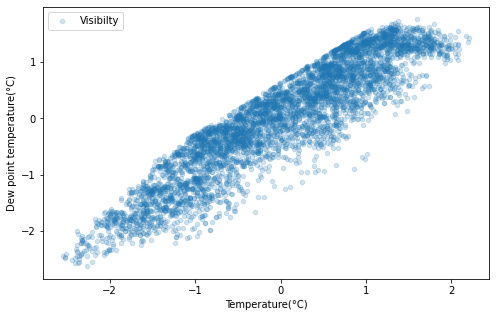

In [49]:
X_train.plot(kind="scatter", x="Temperature(°C)", y="Dew point temperature(°C)",alpha=.2,label="Visibilty", figsize=(8,5))
# scatter plot what why 
#what u found
plt.legend()
plt.show()

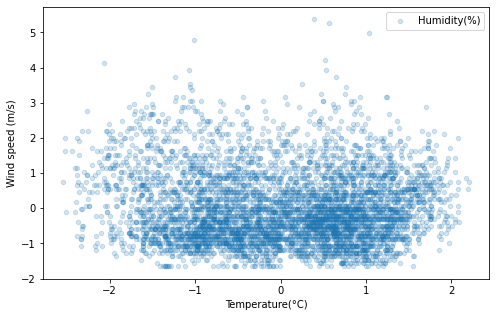

In [44]:
X_train.plot(kind="scatter", x="Temperature(°C)", y="Wind speed (m/s)",alpha=.2,label="Humidity(%)", figsize=(8,5))
# scatter plot what why 
#what u found
plt.legend()
plt.show()

<AxesSubplot:>

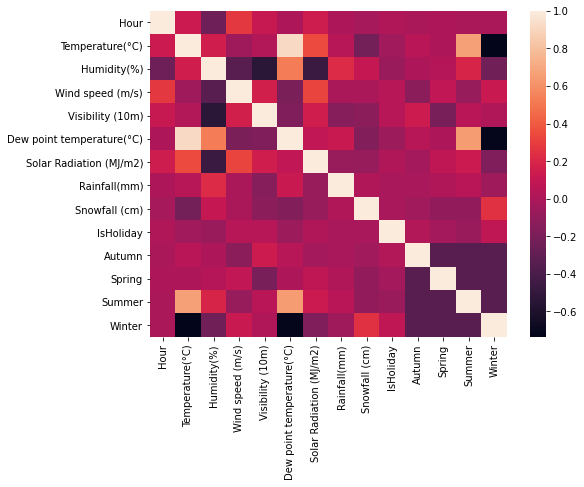

In [45]:
#Show a seaborn heatmap of correlations in X_train
plt.subplots(figsize=(8,6))
sns.heatmap(X_train.corr())

In [52]:
corr_matrix = bikes.corr()
corr_matrix["Bikes_Rented"].sort_values(ascending=False)

Bikes_Rented       1.000000
Temperature        0.542721
Hour               0.412558
Dew_Point          0.387701
Solar_Radiation    0.261868
Visibility         0.192391
Wind_Speed         0.111693
IsHoliday         -0.067563
Rainfall          -0.120431
Snowfall          -0.143341
Humidity          -0.196400
Name: Bikes_Rented, dtype: float64

In [53]:
#as we have already seen, this data is really nice with no null/NaN values
(X_train.isnull().sum() + X_train.isna().sum()).sum()

0

In [54]:
#we now train on 6772 training examples
print(X_train.shape, X_test.shape)

(5082, 14) (2178, 14)


# Select and train a model 

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [143]:
lm = LinearRegression()
lm.fit(X_train, y_train)


# predict counts of X_test
y_pred = lm.predict(X_test)


# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error",mse)

R2 Score: 0.6281487570373183
Mean Absolute Error: 267.38658866120846
Mean Squared Error 124600.72303467749


## Hyperparameter Tuning

Number of features:  14
Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.4s finished


R2 Score: 0.9999686846533538
Mean Absolute Error: 2.064913794301555
Mean Squared Error 6.501753211121989


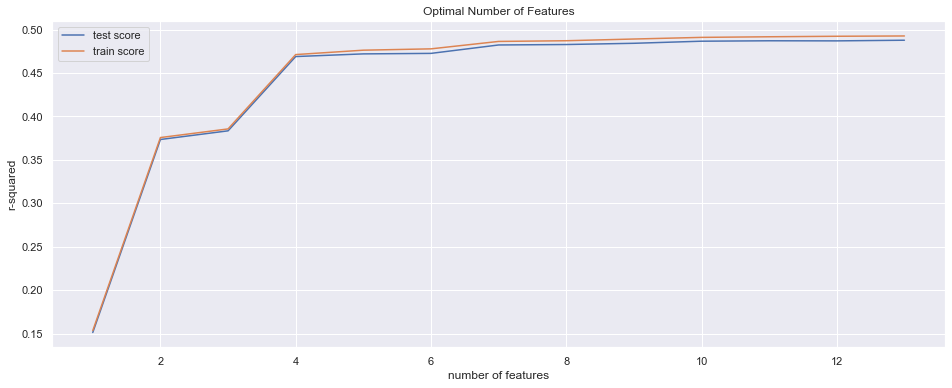

In [151]:
# Hyperparameter Tuning Using Grid Search Cross-Validation
# number of features in X_train
print("Number of features: ", len(X_train.columns))

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)
y_test = model_cv.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error",mse)


# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');


In [83]:
from sklearn.metrics import mean_squared_error

train_preds = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, train_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

459.9141759722935

In [84]:
#since the training labels std is 646, an error of 436 is pretty bad!
y_train.std()

645.5285292314461

In [85]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [462.39476286 456.74579168 455.31343958 463.43772879 482.10960201
 476.71973605 426.41246748 468.15935412 472.86552645 447.84520472]
Mean: 461.20036137305544
Standard deviation: 15.205394465021323


## SVM


In [86]:
# Support Vector Machine Regression
from sklearn.svm import SVR

X = X_train
y = y_train

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [87]:
svr_lin = SVR(kernel='linear', C=1e3)

In [71]:
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [72]:
y_rbf = svr_rbf.fit(X, y).predict(X) #Takes a minute or two

In [73]:
y_lin = svr_lin.fit(X, y).predict(X) #Takes 20 minutes

In [74]:
y_poly = svr_poly.fit(X, y).predict(X)

In [75]:
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve, GridSearchCV

In [76]:
param_grid = { 'C':[0.1, 10, 100],'kernel':['rbf'],'gamma': [1, 0.1, 0.01], 'epsilon': [0.1]}
grid = GridSearchCV(SVR(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 10, 100], 'epsilon': [0.1],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']})

In [77]:

print(grid.best_params_)

print(grid.score(X_test,y_test))

{'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6501951688895744


In [137]:
y_pred = grid.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("coefficient of determination: ",r2)

mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error",mse)

coefficient of determination:  0.6501951688895744
Mean Absolute Error: 235.9640134077264
Mean Squared Error 145368.76281995987


Note that the linear regression mean on the training set is roughly the same as that on cross-validated set. That is, the linear regression model was underfitting on the training set.

### Decision Trees

In [107]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
#Y_pred=tree_reg.predict(X_test)
##sklearn.metrics.accuracy_score(y_test,Y_pred)


DecisionTreeRegressor(random_state=42)

In [92]:
train_preds = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, train_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The decision tree has definitely overfit the data. Let's cross-validate!

In [99]:
#cross_val_score(estimator, X, y, cv=...)
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) #note the negative sign


[406.75508046 409.51602803 465.98987435 435.33846458 422.70533844
 407.18208699 389.75132643 447.49947433 374.61782626 384.25149142]


In [95]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [406.75508046 409.51602803 465.98987435 435.33846458 422.70533844
 407.18208699 389.75132643 447.49947433 374.61782626 384.25149142]
Mean: 414.36069912923915
Standard deviation: 27.382439823594286


So definitely, the decision tree was overfitting the training data. However, it is promising in the sense that its model capacity is higher than linear regression. A simple grid search tells us below tells us that a ``max_depth`` = 9 helps the model slightly

In [96]:
for i in range(1,20,2):
    tree_reg = DecisionTreeRegressor(random_state=1, max_depth=i)
    scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    print(i,":",np.sqrt(-scores).mean())

1 : 559.86985660397
3 : 421.1682232080323
5 : 379.85777068733864
7 : 358.3243156685404
9 : 356.8684899311628
11 : 382.7873894025005
13 : 392.7281461189552
15 : 401.62970406309535
17 : 406.5744554295294
19 : 410.53839266130234


### Random Forests

In [145]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(verbose=1,n_estimators=100, random_state=42)
forest_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


RandomForestRegressor(random_state=42, verbose=1)

In [146]:
y_test = forest_reg.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error",mse)

R2 Score: 0.6136502356355444
Mean Absolute Error: 274.971347920762
Mean Squared Error 134807.41090311809


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [109]:
train_preds = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, train_preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


110.46463072185388

In [110]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Scores: [286.76334264 315.49157828 327.77225379 272.36068193 308.34214837
 326.48751247 256.48423813 310.19464615 268.49946435 278.95379204]
Mean: 295.1349658151188
Standard deviation: 24.326325693439475


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Alright, random forests have better results than decision trees. However, it is still overfitting the training set, as the X_train MSE of 87<232 above. Regularization by snipping ``max_depth`` doesn't help, as seen below.

In [111]:
for i in range(1,20,2):
    forest_reg = RandomForestRegressor(random_state=1, max_depth=i)
    scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    print(i,":",np.sqrt(-scores).mean())

1 : 556.8583881169387
3 : 405.9915732947637
5 : 351.0561890891668
7 : 316.4093515013971
9 : 303.14182587418503
11 : 298.55880304792
13 : 295.92524255703813
15 : 295.9189802021207
17 : 295.23685319449424
19 : 295.45173446658885


In [113]:
## Hyperparameter Tuning for Random Forest

In [142]:
#
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)
y_test = grid_search.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error",mse)

R2 Score: 0.6281487570373183
Mean Absolute Error: 267.38658866120846
Mean Squared Error 124600.72303467749


In [114]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [116]:
np.sqrt(-grid_search.best_score_)

296.63022110762483

In [117]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [119]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.288553330037075, 'Hour'),
 (0.2420245010024253, 'Temperature(°C)'),
 (0.11459348909876353, 'Humidity(%)'),
 (0.08155049988173105, 'Solar Radiation (MJ/m2)'),
 (0.08024014098400656, 'Winter'),
 (0.06275463171112589, 'Dew point temperature(°C)'),
 (0.035791555957168514, 'Visibility (10m)'),
 (0.03415136352647117, 'Wind speed (m/s)'),
 (0.02888248000040447, 'Rainfall(mm)'),
 (0.011403596974036588, 'Autumn'),
 (0.007320305288845607, 'Summer'),
 (0.006790948448291492, 'Spring'),
 (0.005342619994001466, 'IsHoliday'),
 (0.0006005370956531811, 'Snowfall (cm)')]

In [120]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [121]:
final_rmse

311.16974319852585

We can compute a 95% confidence interval for the test RMSE:

In [122]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([285.3905917 , 334.97078728])

In [123]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),IsHoliday,Autumn,Spring,Summer,Winter
7020,0.505165,-0.268957,-1.191617,-0.115916,0.604736,-0.726625,0.186869,-0.128726,-0.173641,-0.23008,1.0,0.0,0.0,0.0
5974,-0.504490,0.320630,0.085565,0.269057,0.924435,0.361613,-0.424497,-0.128726,-0.173641,-0.23008,1.0,0.0,0.0,0.0
6664,-0.360253,-0.642640,-0.110925,0.076570,0.636047,-0.528763,0.371432,-0.128726,-0.173641,-0.23008,1.0,0.0,0.0,0.0
952,-0.504490,-0.850241,0.576789,-1.078349,-1.883642,-0.483103,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
5267,-0.504490,1.067995,0.380299,-0.789619,0.884885,1.122618,0.083052,-0.128726,-0.173641,-0.23008,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-1.369908,0.478407,1.264503,0.750273,-1.351360,0.894316,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,1.0,0.0
5191,-0.216017,1.175947,-1.044250,-0.500889,0.861814,0.529034,2.020964,-0.128726,-0.173641,-0.23008,0.0,0.0,1.0,0.0
5226,-1.081435,1.109515,0.331177,-0.597133,0.169682,1.137838,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,1.0,0.0
5390,-0.216017,1.043082,0.822401,-0.982106,0.916196,1.259599,0.452178,-0.128726,-0.173641,-0.23008,0.0,0.0,1.0,0.0


In [124]:
y

7020    1047
5974     598
6664     996
952      537
5267    1990
        ... 
3772     525
5191     769
5226     193
5390     670
860      177
Name: Bikes_Rented, Length: 5082, dtype: int64

## Multiple Linear Regression

In [135]:
# final model for Multiple Linear Regression
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

# predict counts of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error",mse)

R2 Score: 0.4850777999409588
Mean Absolute Error: 339.77361106575535
Mean Squared Error 213986.76208529854


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


0.48420683811121834


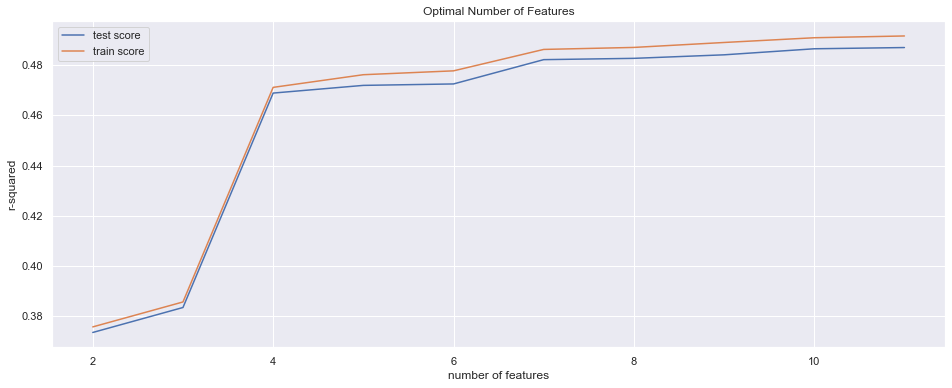

In [139]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 12))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)
y_pred=model_cv.predict(X_test)
acc = sklearn.metrics.r2_score(y_test,y_pred)
print(acc)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');